In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [71]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


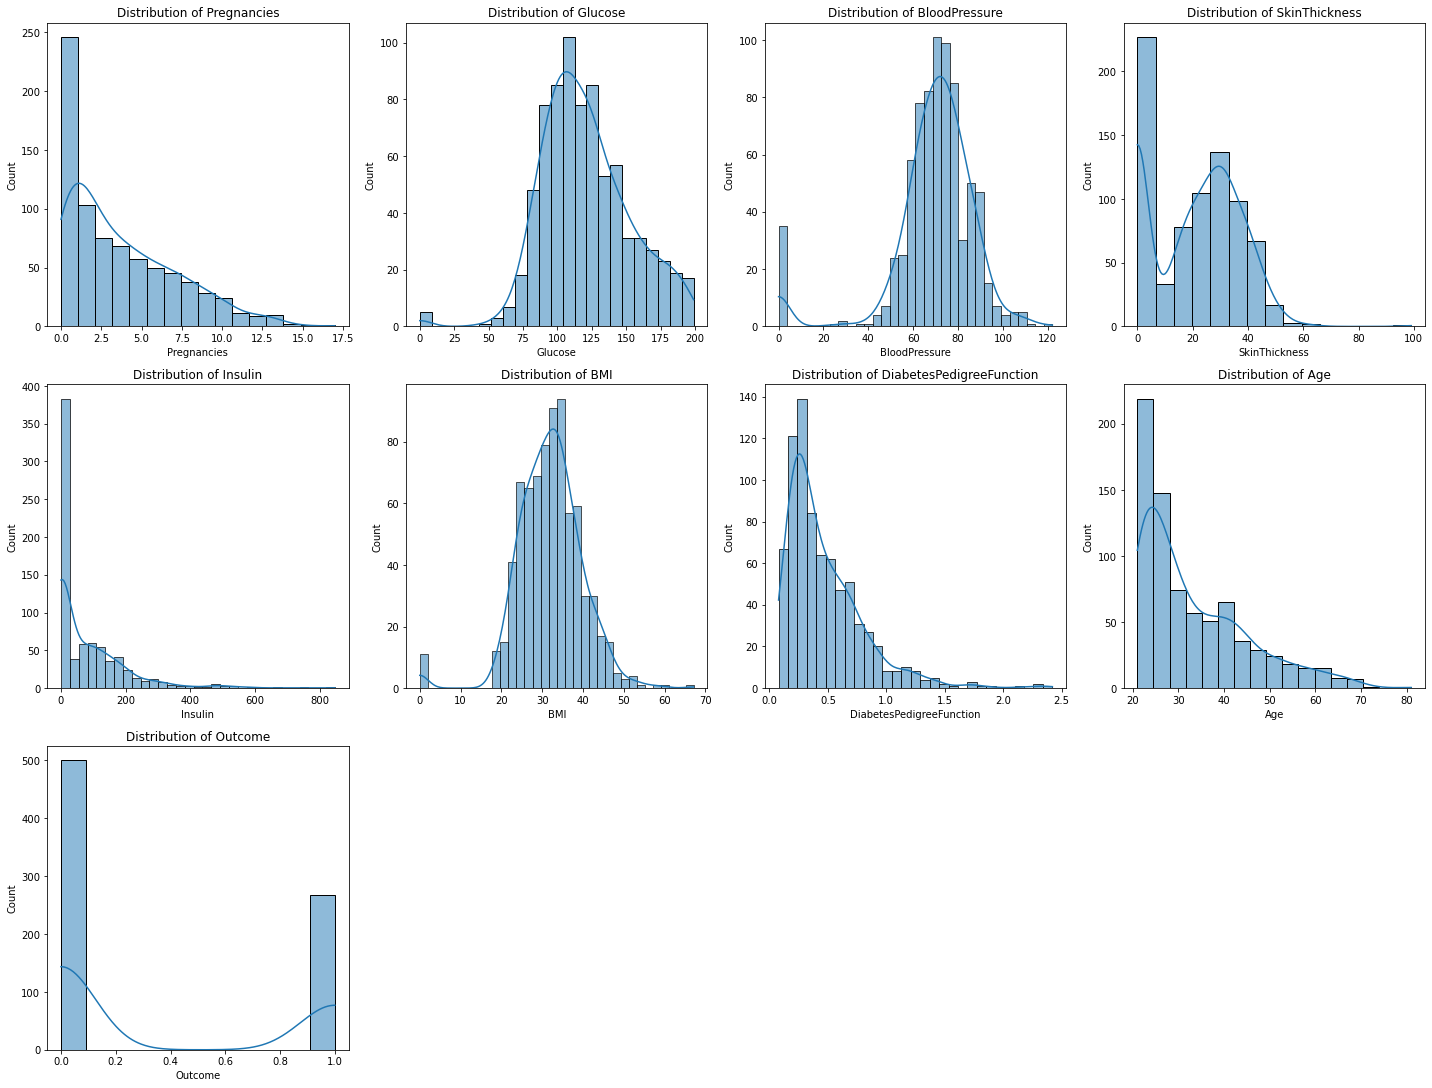

In [5]:
num_columns = len(df.columns)
charts_per_row = 4

# Calculate the number of rows needed
num_rows = (num_columns + charts_per_row - 1) 

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, charts_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Loop through each column and create a distribution plot
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [63]:
X = df.drop(columns=['Outcome'])
y = df.Outcome

In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [65]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
len(X_train)

614

# GridSearchCV

In [66]:
grid_params = {
    'knn__n_neighbors':list(range(1,50)),
    'knn__p': [1,2],
    'knn__metric': ['euclidean','manhattan','minkowski','chebyshev']
}


knn_pipeline = Pipeline([
#     ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

gs = GridSearchCV(knn_pipeline, grid_params, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski',
                                         'chebyshev'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...],
                         'knn__p': [1, 2]})

In [67]:
gs.best_score_

0.7654671464747435

In [68]:
gs.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 31, 'knn__p': 1}

# Bagging classifier

In [53]:
from sklearn.ensemble import BaggingClassifier

In [69]:
bagging_model = BaggingClassifier(
    base_estimator=KNeighborsClassifier(n_neighbors = 31, p=1, metric='manhattan'),
    n_estimators=100,
    max_samples = 0.8,
    oob_score = True,
    random_state=10
)
bagging_model.fit(X_train, y_train)
bagging_model.oob_score_

0.757328990228013

In [70]:
bagging_model.score(X_test, y_test) #slight improvement with bagging classifier

0.7792207792207793

# Decision tree classifier with bagging

In [48]:
from sklearn.tree import DecisionTreeClassifier

bagging_model_t = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples = 0.8,
    oob_score = True,
    random_state=10
)

bagging_model_t.fit(X_train, y_train)
bagging_model_t.oob_score_

0.762214983713355

In [49]:
bagging_model_t.score(X_test, y_test)

0.7662337662337663

# Principal component analysis and dimensionality reduction

In [85]:
from sklearn.decomposition import PCA

In [99]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

In [100]:
X_pca

array([[-75.71465491, -35.95078264,  -7.26078895,  15.66926931],
       [-82.3582676 ,  28.90821322,  -5.49667139,   9.00455376],
       [-74.63064344, -67.90649647,  19.46180812,  -5.65305642],
       ...,
       [ 32.11319827,   3.3766648 ,  -1.58786446,  -0.87844546],
       [-80.21449431, -14.18601977,  12.3512639 , -14.29425948],
       [-81.30814972,  21.62149606,  -8.15276833,  13.82170554]])

In [101]:
X_train_pca, X_test_pca, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train_pca)

614

In [156]:
results_df_0 = pd.DataFrame(gs.cv_results_)
results_0 = results_df_0.sort_values("rank_test_score")
results_0

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
115,0.002580,0.000419,0.003744,0.000445,manhattan,29,2,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.731707,0.804878,0.747967,0.788618,0.737705,0.762175,0.029161,1
114,0.002450,0.000486,0.004116,0.000587,manhattan,29,1,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.731707,0.804878,0.747967,0.788618,0.737705,0.762175,0.029161,1
172,0.002062,0.000118,0.004077,0.000497,minkowski,29,1,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.731707,0.804878,0.747967,0.788618,0.737705,0.762175,0.029161,1
127,0.002051,0.000605,0.003404,0.000355,minkowski,6,2,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.723577,0.804878,0.723577,0.772358,0.778689,0.760616,0.032148,4
10,0.002603,0.000490,0.003903,0.000663,euclidean,6,1,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.723577,0.804878,0.723577,0.772358,0.778689,0.760616,0.032148,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.002012,0.000009,0.003753,0.000559,manhattan,2,2,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.723577,0.723577,0.642276,0.731707,0.721311,0.708490,0.033295,227
118,0.002075,0.000142,0.003069,0.000099,minkowski,2,1,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.723577,0.723577,0.642276,0.731707,0.721311,0.708490,0.033295,227
59,0.002406,0.000484,0.003042,0.000124,manhattan,1,2,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.666667,0.731707,0.642276,0.756098,0.713115,0.701973,0.041828,230
58,0.002303,0.000537,0.003663,0.000479,manhattan,1,1,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.666667,0.731707,0.642276,0.756098,0.713115,0.701973,0.041828,230


In [151]:
gs.predict(X_test[:20])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [118]:
print(y_test[:20])

668    0
324    0
624    0
690    0
473    0
204    0
97     0
336    0
568    0
148    0
667    1
212    0
199    1
265    0
760    0
356    1
501    0
457    0
604    1
213    1
Name: Outcome, dtype: int64


# Logistic Regression

In [121]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train)

614

In [119]:
ln_reg = LogisticRegression()

In [127]:
ln_reg.fit(X_train, y_train)
ln_reg.score(X_test, y_test)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7467532467532467

In [138]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')

In [139]:
svm_model.fit(X_train_pca, y_train)
svm_model.score(X_test_pca, y_test)

0.7532467532467533

In [141]:
search_sp2 = {
    "C":[0.01,0.1,1],
    "gamma": ["auto", "scale"],
    "kernel": ["linear","rbf","sigmoid"]
}
gs_svm = GridSearchCV(SVC(), search_sp2, cv=5)
gs_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [155]:
results_df = pd.DataFrame(gs_svm.cv_results_)
results = results_df.sort_values("rank_test_score")
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.193896,0.037977,0.001670,0.000554,0.1,auto,linear,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.756098,0.813008,0.747967,0.739837,0.778689,0.767120,0.026352,1
9,0.182142,0.038907,0.001204,0.000409,0.1,scale,linear,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.756098,0.813008,0.747967,0.739837,0.778689,0.767120,0.026352,1
15,1.802896,0.595677,0.002031,0.000072,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.756098,0.813008,0.747967,0.731707,0.778689,0.765494,0.028173,3
12,1.634639,0.545151,0.001654,0.000538,1,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.756098,0.813008,0.747967,0.731707,0.778689,0.765494,0.028173,3
0,0.026704,0.004496,0.001777,0.000368,0.01,auto,linear,"{'C': 0.01, 'gamma': 'auto', 'kernel': 'linear'}",0.756098,0.813008,0.739837,0.747967,0.770492,0.765480,0.025831,5
3,0.026101,0.004429,0.001632,0.000423,0.01,scale,linear,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}",0.756098,0.813008,0.739837,0.747967,0.770492,0.765480,0.025831,5
16,0.007428,0.000211,0.004164,0.000207,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.715447,0.796748,0.756098,0.739837,0.754098,0.752446,0.026483,7
14,0.005269,0.000900,0.002219,0.000747,1,auto,sigmoid,"{'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}",0.658537,0.650407,0.650407,0.650407,0.655738,0.653099,0.003414,8
13,0.014953,0.000356,0.007334,0.000436,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.658537,0.650407,0.650407,0.650407,0.655738,0.653099,0.003414,8
11,0.008361,0.000119,0.002239,0.000478,0.1,scale,sigmoid,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.658537,0.650407,0.650407,0.650407,0.655738,0.653099,0.003414,8
